In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

In [2]:
# LC_sweep_data_20190921_201251 has a period of 40ms and is used for LC monotonic.
LC_sweep = np.load('LC_sweep_data_20190921_201251.npz')
coarse, mid, fine, LC_code, counts_LC = LC_sweep['coarse'], LC_sweep['mid'], LC_sweep['fine'], LC_sweep['LC_code'], LC_sweep['counts_LC']

In [3]:
counts_LC[7247] = (counts_LC[7246] + counts_LC[7248]) // 2
counts_LC[13118] = (counts_LC[13117] + counts_LC[13119]) // 2
counts_LC[18990] = (counts_LC[18989] + counts_LC[18991]) // 2
counts_LC[20612] = (counts_LC[20611] + counts_LC[20613]) // 2
counts_LC[22030] = (counts_LC[22029] + counts_LC[22031]) // 2
counts_LC[22434] = (counts_LC[22433] + counts_LC[22435]) // 2
counts_LC[29721] = (counts_LC[29720] + counts_LC[29722]) // 2
counts_LC[30124] = (counts_LC[30123] + counts_LC[30125]) // 2

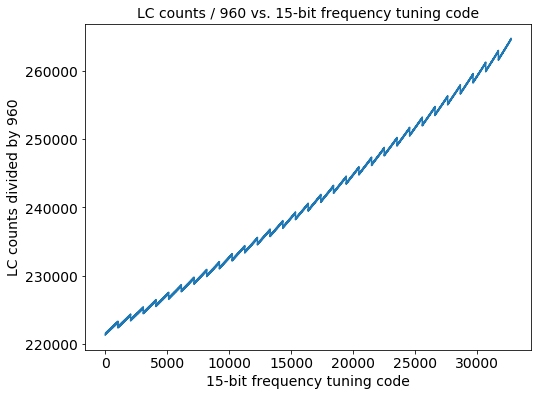

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(LC_code, counts_LC)
plt.title('LC counts / 960 vs. 15-bit frequency tuning code', fontsize=14)
plt.xlabel('15-bit frequency tuning code', fontsize=14)
plt.ylabel('LC counts divided by 960', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('lc_count_vs_tuning_code.pdf', bbox_inches='tight')
plt.show()

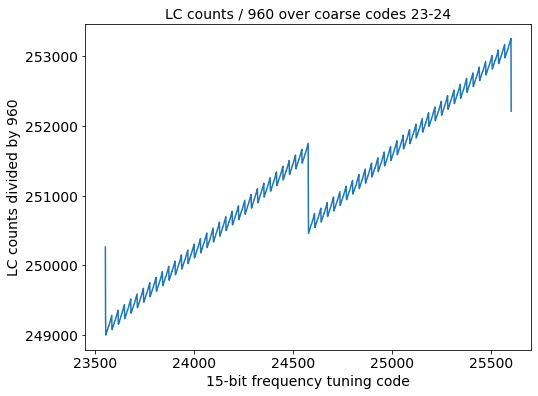

In [5]:
plt.figure(figsize=(8, 6))
plt.plot(LC_code[23 * 2 ** 10 - 1:25 * 2 ** 10 + 1], counts_LC[23 * 2 ** 10 - 1:25 * 2 ** 10 + 1])
plt.title('LC counts / 960 over coarse codes 23-24', fontsize=14)
plt.xlabel('15-bit frequency tuning code', fontsize=14)
plt.ylabel('LC counts divided by 960', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('lc_count_over_2_coarse.pdf', bbox_inches='tight')
plt.show()

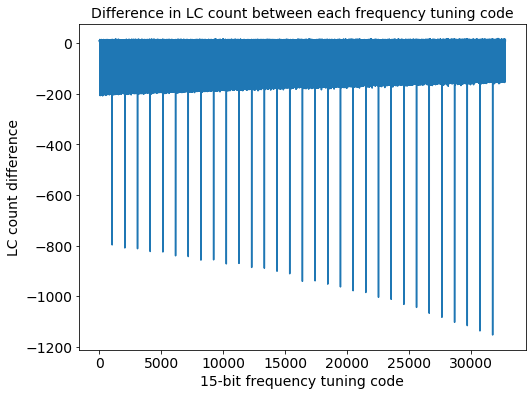

In [6]:
plt.figure(figsize=(8, 6))
plt.plot(np.diff(counts_LC))
plt.title('Difference in LC count between each frequency tuning code', fontsize=14)
plt.xlabel('15-bit frequency tuning code', fontsize=14)
plt.ylabel('LC count difference', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('lc_count_diff_vs_tuning_code.pdf', bbox_inches='tight')
plt.show()

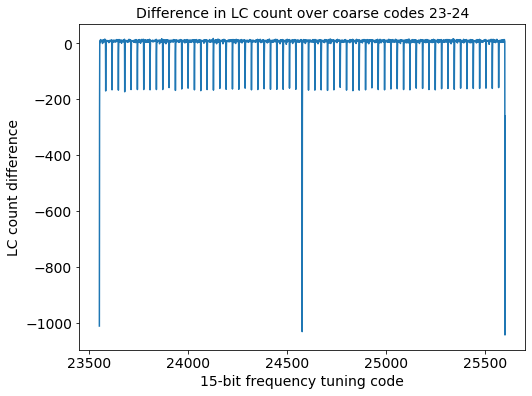

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(LC_code[23 * 2 ** 10 - 1:25 * 2 ** 10 + 1], np.diff(counts_LC)[23 * 2 ** 10 - 1:25 * 2 ** 10 + 1])
plt.title('Difference in LC count over coarse codes 23-24', fontsize=14)
plt.xlabel('15-bit frequency tuning code', fontsize=14)
plt.ylabel('LC count difference', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('lc_count_diff_over_2_coarse.pdf', bbox_inches='tight')
plt.show()

In [8]:
LC_sweep = np.load('LC_sweep_data_20190920_170537.npz')
coarse, mid, fine, LC_code, counts_LC = LC_sweep['coarse'], LC_sweep['mid'], LC_sweep['fine'], LC_sweep['LC_code'], LC_sweep['counts_LC']

In [9]:
indices = []

current_count_LC = -1
for i, count_LC in zip(LC_code, counts_LC):
    if count_LC > current_count_LC + 8:
        indices.append(i)
        current_count_LC = count_LC

print("Num of indices:", len(indices))

Num of indices: 1133


In [10]:
print(indices)

[0, 2, 4, 6, 8, 13, 15, 17, 22, 29, 31, 90, 94, 95, 150, 155, 157, 158, 221, 222, 277, 282, 284, 343, 347, 383, 411, 438, 443, 446, 475, 506, 507, 509, 542, 570, 571, 600, 601, 636, 638, 671, 700, 728, 731, 732, 734, 799, 830, 858, 862, 893, 894, 895, 927, 958, 959, 1018, 1020, 1470, 1497, 1502, 1564, 1595, 1598, 1627, 1629, 1656, 1660, 1662, 1693, 1726, 1754, 1755, 1759, 1818, 1853, 1855, 1886, 1913, 1943, 1950, 1981, 1983, 2043, 2047, 2493, 2521, 2524, 2527, 2553, 2588, 2622, 2683, 2684, 2687, 2718, 2719, 2777, 2781, 2783, 2808, 2813, 2841, 2875, 2877, 2903, 2909, 2911, 2942, 2974, 2975, 3037, 3038, 3066, 3070, 3071, 3483, 3486, 3541, 3551, 3577, 3607, 3609, 3611, 3615, 3647, 3677, 3708, 3741, 3769, 3803, 3804, 3806, 3866, 3871, 3902, 3934, 3966, 3993, 3997, 4024, 4030, 4031, 4086, 4088, 4479, 4564, 4567, 4575, 4603, 4630, 4632, 4633, 4635, 4669, 4700, 4732, 4734, 4767, 4824, 4827, 4829, 4858, 4859, 4952, 4958, 4959, 4986, 5020, 5022, 5023, 5087, 5115, 5561, 5564, 5567, 5593, 5597, 5

Slope: 15.464740836383092 Intercept: 88415.74662482429


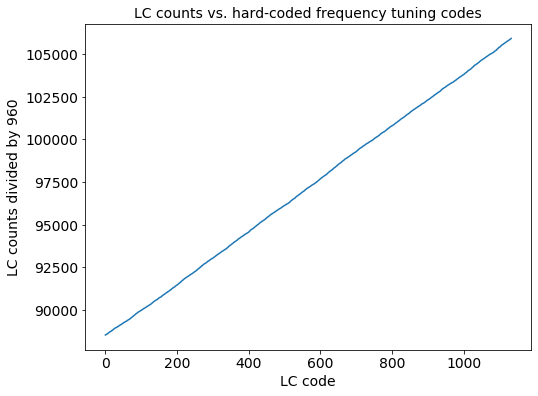

In [11]:
counts_LC_trunc = counts_LC[indices]
x = np.arange(len(counts_LC_trunc))

slope, intercept = scipy.stats.linregress(x, counts_LC_trunc)[:2]
print('Slope:', slope, 'Intercept:', intercept)
lin_approx = slope * x + intercept

plt.figure(figsize=(8, 6))
plt.plot(counts_LC[indices])
# plt.plot(lin_approx)
plt.title('LC counts vs. hard-coded frequency tuning codes', fontsize=14)
plt.xlabel('LC code', fontsize=14)
plt.ylabel('LC counts divided by 960', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

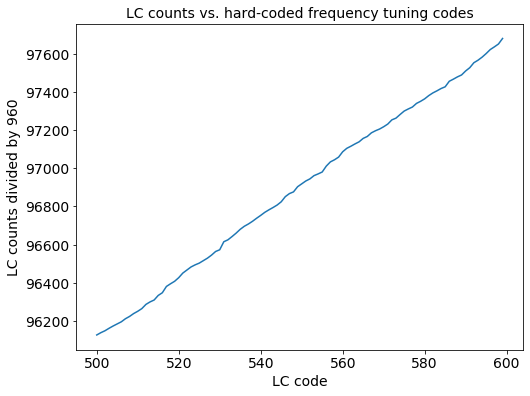

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(500, 600), counts_LC[indices][500:600])
# plt.plot(lin_approx)
plt.title('LC counts vs. hard-coded frequency tuning codes', fontsize=14)
plt.xlabel('LC code', fontsize=14)
plt.ylabel('LC counts divided by 960', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

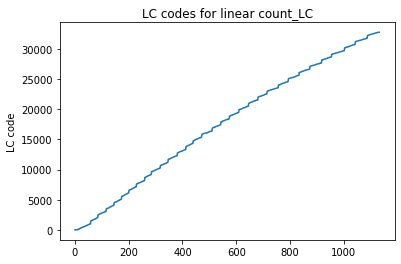

In [13]:
plt.plot(LC_code[indices])
plt.title('LC codes for linear count_LC')
plt.ylabel('LC code')
plt.show()

In [14]:
LC_monotonic_sweep = np.load('LC_monotonic_sweep_data_20190920_172236_8.npz')
coarse_monotonic, mid_monotonic, fine_monotonic, LC_code_monotonic, counts_LC_monotonic = LC_monotonic_sweep['coarse'], LC_monotonic_sweep['mid'], LC_monotonic_sweep['fine'], LC_monotonic_sweep['LC_code'], LC_monotonic_sweep['counts_LC']

Slope: 15.432630469338418 Intercept: 88446.87784455746


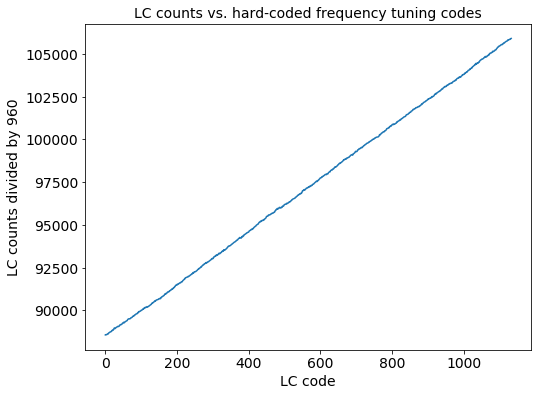

In [15]:
slope, intercept = scipy.stats.linregress(np.arange(len(counts_LC_monotonic)), counts_LC_monotonic)[:2]
print('Slope:', slope, 'Intercept:', intercept)

plt.figure(figsize=(8, 6))
plt.plot(counts_LC_monotonic)
plt.title('LC counts vs. hard-coded frequency tuning codes', fontsize=14)
plt.xlabel('LC code', fontsize=14)
plt.ylabel('LC counts divided by 960', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

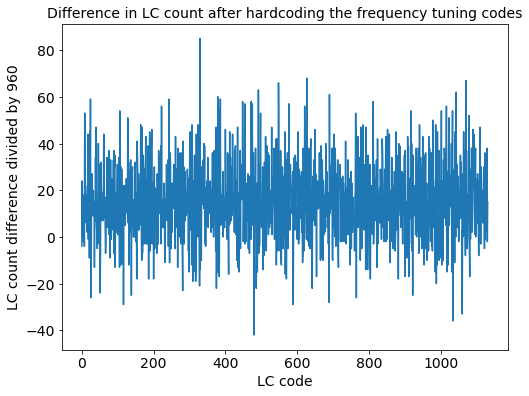

In [16]:
plt.figure(figsize=(8, 6))
plt.plot(np.diff(counts_LC_monotonic))
plt.title('Difference in LC count after hardcoding the frequency tuning codes', fontsize=14)
plt.xlabel('LC code', fontsize=14)
plt.ylabel('LC count difference divided by 960', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

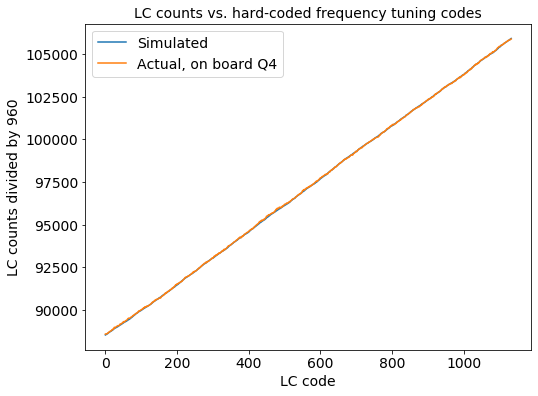

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(counts_LC[indices], label="Simulated")
plt.plot(counts_LC_monotonic, label="Actual, on board Q4")
plt.title('LC counts vs. hard-coded frequency tuning codes', fontsize=14)
plt.xlabel('LC code', fontsize=14)
plt.ylabel('LC counts divided by 960', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig('lc_hardcoded.pdf', bbox_inches='tight')
plt.show()

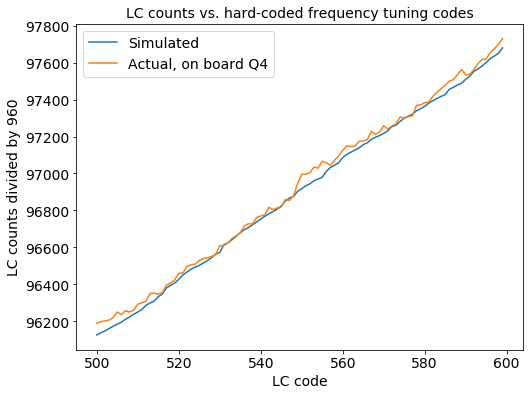

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(500, 600), counts_LC[indices][500:600], label="Simulated")
plt.plot(np.arange(500, 600), counts_LC_monotonic[500:600], label="Actual, on board Q4")
plt.title('LC counts vs. hard-coded frequency tuning codes', fontsize=14)
plt.xlabel('LC code', fontsize=14)
plt.ylabel('LC counts divided by 960', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig('lc_hardcoded_zoom.pdf', bbox_inches='tight')
plt.show()

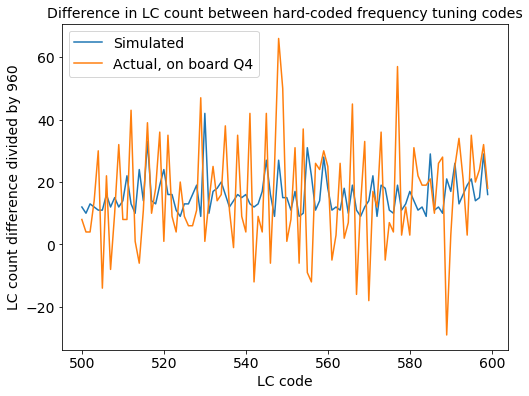

In [19]:
plt.figure(figsize=(8, 6))
plt.plot(np.arange(500, 600), np.diff(counts_LC[indices])[500:600], label="Simulated")
plt.plot(np.arange(500, 600), np.diff(counts_LC_monotonic)[500:600], label="Actual, on board Q4")
plt.title('Difference in LC count between hard-coded frequency tuning codes', fontsize=14)
plt.xlabel('LC code', fontsize=14)
plt.ylabel('LC count difference divided by 960', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig('lc_hardcoded_diff_zoom.pdf', bbox_inches='tight')
plt.show()